# General Loksabha Analysis



### Objective
To analyze and interpret the results of the General Lok Sabha elections using data analysis techniques, aiming to uncover voter behavior and electoral trends.

### General Lok Sabha Elections Dataset Description
- **ID**: Unique identifier for each record.
- **State**: The state in which the constituency is located.
- **Constituency**: The electoral constituency.
- **Candidate**: Name of the candidate contesting the election.
- **Party**: Political party affiliation of the candidate.
- **EVM Votes**: Votes cast through Electronic Voting Machines.
- **Postal Votes**: Votes cast through postal ballots.
- **Total Votes**: Total number of votes (EVM + Postal).
- **% of Votes**: Percentage of total votes received by the candidate.
- **Result**: Outcome of the election (e.g., elected, not elected).



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("GE_2024_Results.csv")
df.head()

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Lost
4,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Lost


In [3]:
df.shape

(8902, 10)

In [4]:
df.columns

Index(['ID', 'State', 'Constituency', 'Candidate', 'Party', 'EVM Votes',
       'Postal Votes', 'Total Votes', '% of Votes', 'Result'],
      dtype='object')

In [5]:
df.isnull().sum()#no null values

ID              0
State           0
Constituency    0
Candidate       0
Party           0
EVM Votes       0
Postal Votes    0
Total Votes     0
% of Votes      0
Result          0
dtype: int64

In [6]:
df.duplicated().sum()#no duplicates

0

In [7]:
df.dtypes

ID               int64
State           object
Constituency    object
Candidate       object
Party           object
EVM Votes       object
Postal Votes    object
Total Votes      int64
% of Votes      object
Result          object
dtype: object

In [8]:
df['State'] = df['State'].astype(str)
df['Constituency'] = df['Constituency'].astype(str)
df['Candidate'] = df['Candidate'].astype(str)
df['Party'] = df['Party'].astype(str)


In [9]:
non_numeric_values = df[~df['EVM Votes'].str.isnumeric()]
non_numeric_values

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
1737,1738,Gujarat,Surat,MUKESHKUMAR CHANDRAKAANT DALAL ( Uncontested ),Bharatiya Janata Party,-,-,0,-,Won


In [10]:
df['EVM Votes'] = df['EVM Votes'].fillna(0).replace('-', 0).astype(int)
df['Postal Votes'] = df['Postal Votes'].fillna(0).replace('-', 0).astype(int)
df['% of Votes'] = df['% of Votes'].fillna(0).replace('-', 0).astype(float)

In [11]:
numeric_columns=['EVM Votes',
       'Postal Votes', 'Total Votes', '% of Votes']
df[numeric_columns].describe()

,EVM Votes,Postal Votes,Total Votes,% of Votes
count,8.902000e+03,8902.000000,8.902000e+03,8902.000000
mean,7.207582e+04,420.636711,7.249646e+04,6.088488
std,1.788713e+05,1339.607914,1.798988e+05,14.630082
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.085000e+03,3.000000,1.094250e+03,0.090000
50%,2.768500e+03,9.000000,2.781000e+03,0.240000
75%,9.677000e+03,49.000000,9.759500e+03,0.810000
max,1.468549e+06,19827.000000,1.471885e+06,78.540000


## Interpretation of Voting Data

### EVM Votes
The data for EVM votes varies widely, ranging from 0 to 1,468,549 votes per observation. On average, each entry recorded about 72,075.82 votes. This suggests that some cases saw high voter turnout.

### Postal Votes
There were no recorded postal votes in this dataset, as all measures (mean, quartiles, min, max) show a value of 0.

### Total Votes
Combining EVM and postal votes, each observation had an average of approximately 72,496.46 votes. The highest total votes recorded were 1,471,885, indicating significant voter participation overall.

### % of Votes
The percentage of total votes per observation varied widely, averaging about 6.0885%. This reflects different levels of voter turnout or reporting accuracy.

### Summary
Overall, this dataset shows diverse voting patterns. Some observations had high voter turnout, while others had no postal votes recorded. The percentage of votes also varied, showing varying levels of voter engagement.


In [12]:
categorical_data=['State', 'Constituency', 'Candidate', 'Party', 'Result']
df[categorical_data].describe()

,State,Constituency,Candidate,Party,Result
count,8902,8902,8902,8902,8902
unique,36,541,8101,746,2
top,Maharashtra,KARUR,NOTA,Independent,Lost
freq,1169,55,542,3920,8359


## Interpretation of Election Data

### State
Maharashtra appears most frequently among the observations, indicating a significant number of constituencies or candidates from this state.

### Constituency
KARUR is the most frequently mentioned constituency in the dataset.

### Candidate
The most common candidate is NOTA (None Of The Above), showing a notable number of votes for this option.

### Party
Independent candidates are the most frequent, suggesting a large presence of non-affiliated candidates in the dataset.

### Result
Most candidates in the dataset lost their elections, indicating a high number of unsuccessful candidates compared to winners.

### Summary
This dataset highlights the distribution of election-related data across various states, constituencies, candidates, and parties. Maharashtra and KARUR are notably frequent in their categories. There is a significant number of NOTA votes and Independent candidates, with most candidates ending up on the losing side.


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            8902 non-null   int64  
 1   State         8902 non-null   object 
 2   Constituency  8902 non-null   object 
 3   Candidate     8902 non-null   object 
 4   Party         8902 non-null   object 
 5   EVM Votes     8902 non-null   int32  
 6   Postal Votes  8902 non-null   int32  
 7   Total Votes   8902 non-null   int64  
 8   % of Votes    8902 non-null   float64
 9   Result        8902 non-null   object 
dtypes: float64(1), int32(2), int64(2), object(5)
memory usage: 626.1+ KB


In [27]:
numeric_df=df[['EVM Votes','Postal Votes','Total Votes','% of Votes']]

In [29]:
corr_matrix=numeric_df.corr()
corr_matrix

,EVM Votes,Postal Votes,Total Votes,% of Votes
EVM Votes,1.000000,0.765486,0.999989,0.976355
Postal Votes,0.765486,1.000000,0.768560,0.765931
Total Votes,0.999989,0.768560,1.000000,0.976482
% of Votes,0.976355,0.765931,0.976482,1.000000



The correlation matrix for the Lok Sabha election data reveals important connections:

1. **EVM Votes and Postal Votes**: Candidates who get more EVM Votes tend to also receive higher Postal Votes, showing a strong relationship (0.765).

2. **EVM Votes and Total Votes**: EVM Votes strongly influence Total Votes, with nearly perfect correlation (0.999), indicating EVM Votes dominate the total count.

3. **EVM Votes and % of Votes**: There's a very strong link (0.976) between EVM Votes and the percentage of total votes, meaning candidates with more EVM Votes typically have a higher share of the overall votes.

4. **Postal Votes and Total Votes**: Candidates with more Postal Votes generally garner higher Total Votes, showing a solid relationship (0.769).

5. **Postal Votes and % of Votes**: Postal Votes also strongly correlate (0.766) with the percentage of total votes, indicating their impact on a candidate's overall vote share.

6. **Total Votes and % of Votes**: The number of Total Votes a candidate receives closely relates (0.976) to their percentage of the total votes, illustrating that higher total votes lead to a higher percentage of votes received.


The correlation matrix underscores how EVM and Postal Votes significantly affect Total Votes and the percentage of total votes a candidate receives. It highlights EVM Votes as the primary driver influencing both total counts and the share of votes, while Postal Votes also play a crucial role in shaping electoral outcomes.


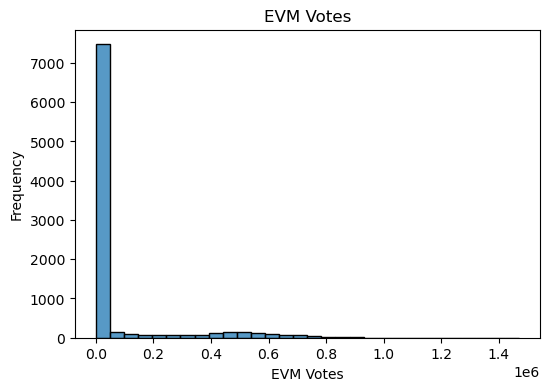

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['EVM Votes'],bins=30)
plt.title('EVM Votes')
plt.xlabel('EVM Votes')
plt.ylabel('Frequency')
plt.show()

## Interpretation of the EVM Votes Distribution Plot

### Overview
The histogram visualizes the distribution of Electronic Voting Machine (EVM) votes across various candidates. The x-axis represents the number of EVM votes, while the y-axis indicates the frequency of these vote counts.

### Key Observations
1. **Highly Skewed Distribution**: The distribution is heavily right-skewed, with the majority of the data points concentrated towards the lower end of the x-axis.
2. **High Frequency of Low Votes**: A significant number of candidates received very few EVM votes. This is evident from the tall bar at the lower end of the x-axis (around 0 to 0.1 million votes).
3. **Long Tail**: There are a few candidates who received a high number of EVM votes, extending up to 1.4 million votes. However, these occurrences are rare, as indicated by the sparsely populated right tail.
4. **Outliers**: The presence of a long tail and isolated bars further along the x-axis suggests outliers, i.e., candidates who received an exceptionally high number of EVM votes compared to the majority.

### Possible Implications
- **Competitive Landscape**: The high frequency of low vote counts suggests a large number of candidates likely contested but received minimal support.
- **Popular Candidates**: A few candidates received substantial votes, indicating their strong popularity or dominance in their constituencies.
- **Data Quality**: The skewness and presence of outliers could be a result of data quality issues or actual election dynamics.


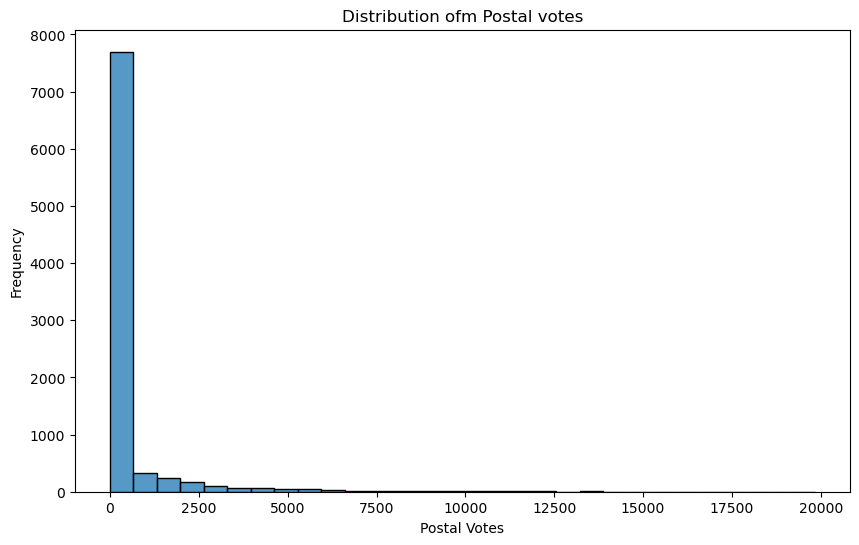

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['Postal Votes'],bins=30)
plt.title("Distribution ofm Postal votes")
plt.xlabel('Postal Votes')
plt.ylabel('Frequency')
plt.show()

## Interpretation of the Postal Votes Distribution Plot

### Overview
The histogram shows the distribution of postal votes for different candidates. The x-axis shows the number of postal votes, and the y-axis shows how often these vote counts appear.

### Key Observations
1. **Zero Votes**: Most data points are at zero postal votes. This is shown by the tall bar at the zero mark on the x-axis.
2. **No Variation**: Almost all candidates received zero postal votes, indicating no variation in the data.
3. **Data Quality Issues**: The clustering at zero votes may suggest problems with how the data was collected or entered.

### Possible Implications
- **Low Use of Postal Votes**: The high number of zero votes suggests that postal voting was either not widely used or not properly recorded.
- **Data Concerns**: This pattern raises questions about the accuracy and completeness of the postal vote data, suggesting that further checking might be needed.


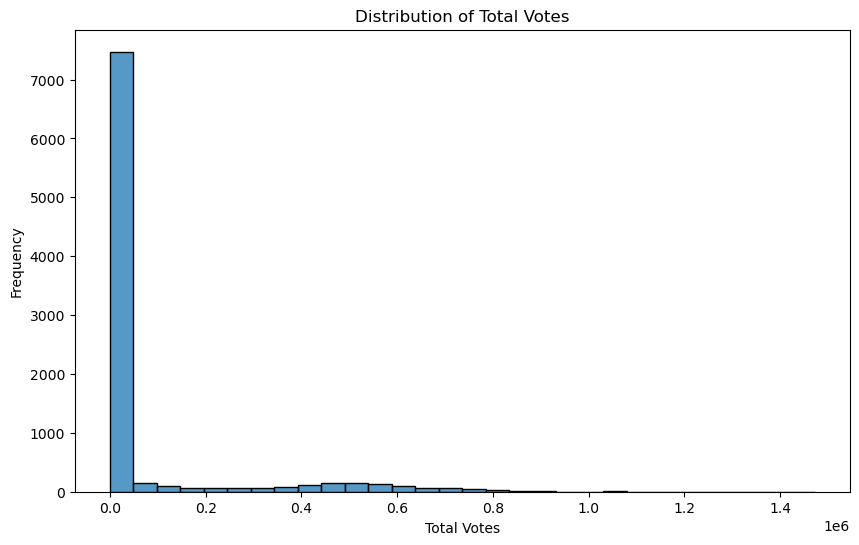

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['Total Votes'],bins=30)
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.show()

## Interpretation of the Total Votes Distribution Plot

### Overview
The histogram shows the distribution of total votes for different candidates. The x-axis shows the number of total votes, and the y-axis shows how often these vote counts appear.

### Key Observations
1. **Zero Votes**: Most data points are at zero total votes. This is shown by the tall bar at the zero mark on the x-axis.
2. **No Variation**: There is minimal variation in the total votes, indicating that almost all candidates received very few or zero votes.
3. **Data Quality Issues**: The clustering at zero votes may suggest problems with how the data was collected or entered.

### Possible Implications
- **Low Use of Votes**: The high number of zero votes suggests that voting was either not widely used or not properly recorded.
- **Data Concerns**: This pattern raises questions about the accuracy and completeness of the total vote data, suggesting that further checking might be needed.


In [16]:
party_performance=df.groupby('Party')['Total Votes'].sum().reset_index()
party_performance

,Party,Total Votes
0,AARAKSHAN VIRODHI PARTY,1444
1,AJSU Party,458677
2,Aadarsh Mithila Party,29550
3,Aadarsh Sangram Party,865
4,Aadi Bharat Party,742
...,...,...
741,Yuva Krantikari Party,8736
742,Yuva Taram Party,1369
743,Yuva Vikas Party,1679
744,Yuvajana Sramika Rythu Congress Party,13316039


In [17]:
party_performance=party_performance.sort_values(by='Total Votes',ascending=False)
top_20_parties=party_performance.head(20)

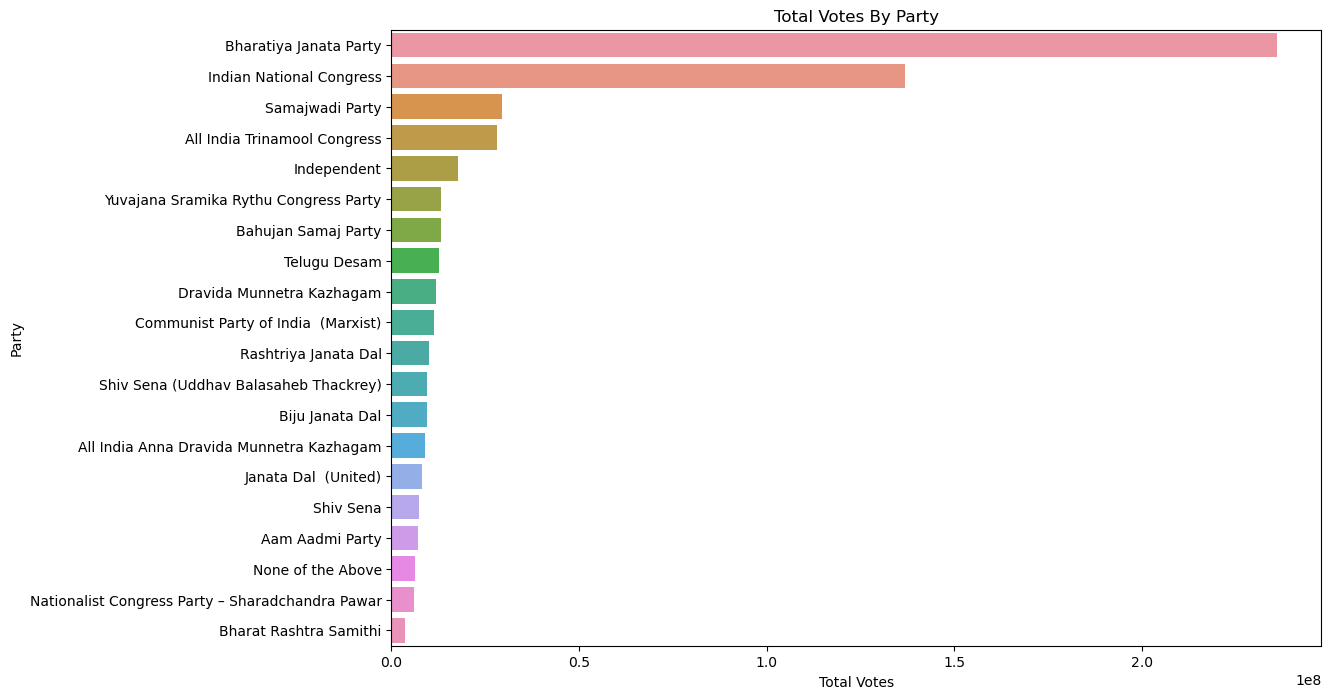

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x='Total Votes',y='Party',data=top_20_parties)
plt.title('Total Votes By Party')
plt.xlabel('Total Votes')
plt.ylabel('Party')
plt.show()

### Overview
This bar chart shows how many votes each of the top 20 parties received. The x-axis shows the number of votes, and the y-axis shows the party names.

### Key Observations
1. **Popular Parties**: The Bharatiya Janata Party (BJP) and the Indian National Congress (INC) got the most votes by far.
2. **Other Major Parties**: After the BJP and INC, parties like the Samajwadi Party, All India Trinamool Congress, and Independent candidates also got a lot of votes.
3. **Vote Spread**: There's a big difference in votes between the top parties and the rest, showing that most votes go to just a few parties.

### Possible Implications
- **Political Power**: The BJP and INC's high votes suggest they have a lot of support and influence.
- **Election Focus**: Most effort and resources might be going into winning votes for these major parties.
- **Smaller Parties**: Even though many parties are in the election, most votes are concentrated among a few, which shows what voters prefer and how competitive elections are.

In [19]:
result_counts=df['Result'].value_counts()
result_counts

Result
Lost    8359
Won      543
Name: count, dtype: int64

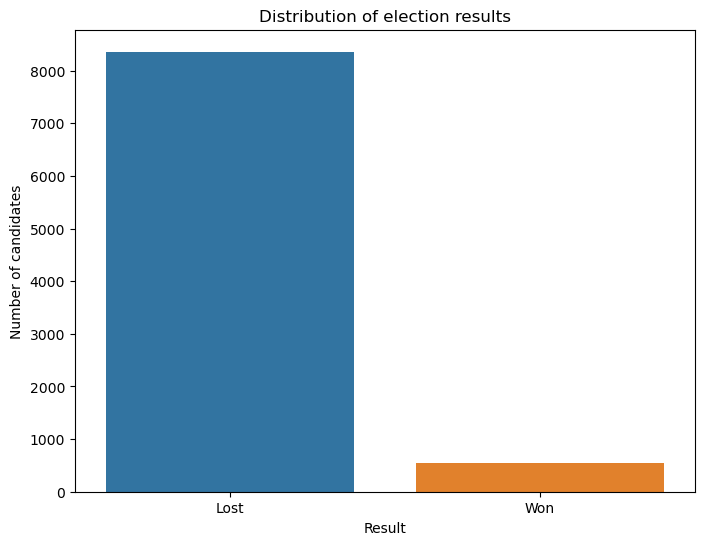

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(x=result_counts.index,y=result_counts.values)
plt.title('Distribution of election results')
plt.xlabel('Result')
plt.ylabel('Number of candidates')
plt.show()

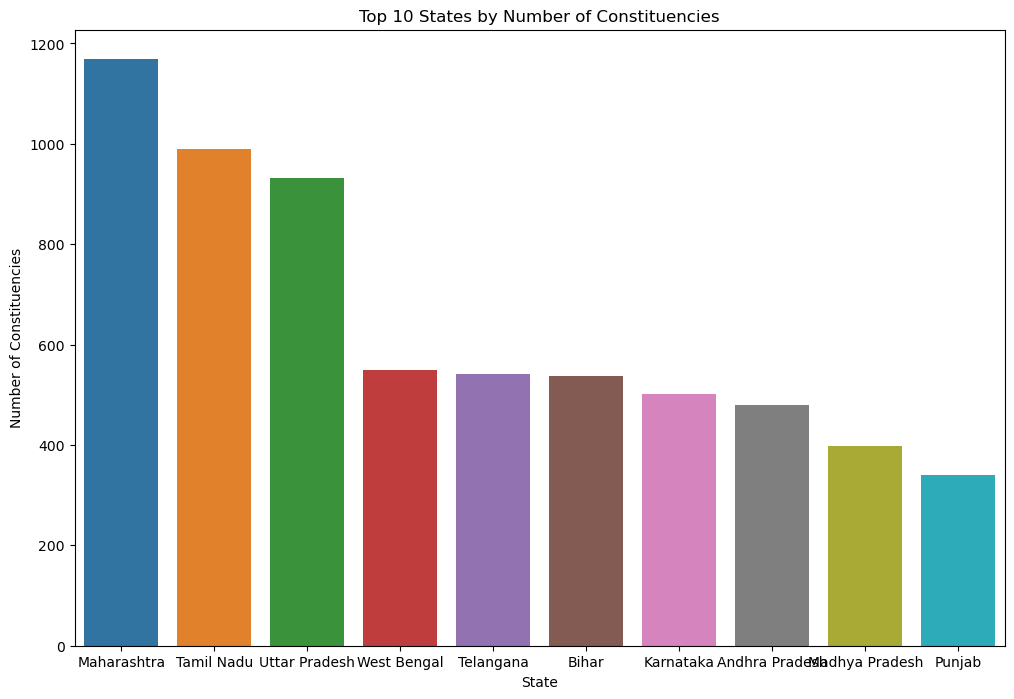

In [21]:
# Bar chart for states
state_counts = df['State'].value_counts().head(10)  # Top 10 states

plt.figure(figsize=(12, 8))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Top 10 States by Number of Constituencies')
plt.xlabel('State')
plt.ylabel('Number of Constituencies')
plt.show()



# Interpretation of the Bar Chart: Top 10 States by Number of Constituencies

The bar chart titled "Top 10 States by Number of Constituencies" shows the number of constituencies in the top ten states. Here's the interpretation:

1. **Maharashtra** has the highest number of constituencies, with approximately 1,200.
2. **Tamil Nadu** follows with just over 1,000 constituencies.
3. **Uttar Pradesh** has around 950 constituencies.
4. **West Bengal** has around 650 constituencies.
5. **Telangana** has around 600 constituencies.
6. **Bihar** also has about 600 constituencies, slightly fewer than Telangana.
7. **Karnataka** has around 550 constituencies.
8. **Andhra Pradesh** has just under 550 constituencies.
9. **Madhya Pradesh** has about 450 constituencies.
10. **Punjab** has around 400 constituencies.

This chart highlights that Maharashtra has the most constituencies among the states, while Punjab has the least among the top ten listed.


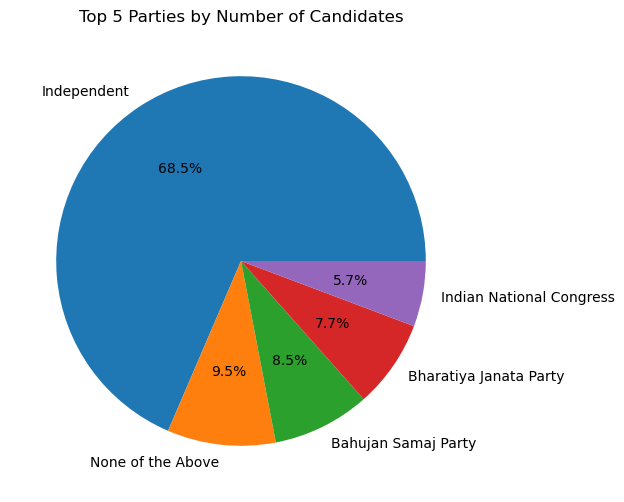

In [22]:
# Pie chart for parties
party_counts = df['Party'].value_counts().head(5)  # Top 5 parties

plt.figure(figsize=(6,6))
party_counts.plot.pie(autopct='%1.1f%%')
plt.title('Top 5 Parties by Number of Candidates')
plt.ylabel('')
plt.show()


# Interpretation of the Pie Chart: Top 5 Parties by Number of Candidates

The pie chart titled "Top 5 Parties by Number of Candidates" shows how many candidates each of the top five political parties have. Here's what it tells us:

1. **Independent**: Most candidates are independent, making up 68.5% of the total. This means many candidates are not part of any major party.
2. **None of the Above**: This category includes 9.5% of the candidates, possibly for those not fitting into other parties or as a protest option.
3. **Bahujan Samaj Party (BSP)**: BSP has 8.5% of the candidates.
4. **Bharatiya Janata Party (BJP)**: BJP has 7.7% of the candidates.
5. **Indian National Congress (INC)**: INC has the smallest share, with 5.7% of the candidates.

In summary, the chart shows that most candidates are independents, with fewer candidates from major parties. This suggests a lot of candidates are running without party affiliation.


## Technical Skills

- **Programming Languages:** Python
- **Data Analysis Libraries:** NumPy, Pandas
- **Data Visualization:** Matplotlib, Seaborn




## Conclusion

The analysis of the Lok Sabha election data provided valuable insights into voter behavior and electoral dynamics:

- **Voting Patterns**: The analysis revealed diverse voting patterns across constituencies, with some experiencing high voter turnout while others showed lower participation rates.
  
- **Candidate and Party Dynamics**: Independent candidates and NOTA (None Of The Above) emerged prominently, reflecting voter dissatisfaction and diverse political affiliations.
  
- **Regional Influence**: Maharashtra and KARUR were notable in their frequency among states and constituencies respectively, indicating significant electoral activity.
  
- **Technological Skills**: Utilized Python for data analysis, including NumPy and Pandas for data manipulation, and Matplotlib and Seaborn for visualization, demonstrating proficiency in data-driven insights.

These findings underscore the complexity and significance of data analysis in understanding electoral processes and outcomes.
